In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

In [0]:
cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'],cancer_dataset['target']],
             columns = np.append(cancer_dataset['feature_names'], ['target']))

In [0]:
cancer_df.head(3)

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0


In [0]:
#cancer_df.drop('mean radius',inplace=True,axis=1)

KeyError: ignored

In [0]:
cancer_df.head()

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [0]:
cancer_df.drop('mean area',inplace=True,axis=1)

In [0]:
cancer_df.drop('mean smoothness',inplace=True,axis=1)

In [0]:
cancer_df.drop('mean compactness',inplace=True,axis=1)

In [0]:
cancer_df.drop('mean concave points',inplace=True,axis=1)

In [0]:
cancer_df.drop('mean symmetry',inplace=True,axis=1)

In [0]:
cancer_df.drop('mean fractal dimension',inplace=True,axis=1)

In [0]:
cancer_df.drop('radius error',inplace=True,axis=1)

In [0]:
cancer_df.drop(['texture error','area error','smoothness error','compactness error','concavity error','concave points error','symmetry error','fractal dimension error','worst smoothness','worst concavity','worst concave points','worst symmetry','worst fractal dimension'],inplace=True,axis=1)

In [0]:
cancer_df.head()        #Final dataset with best 9 features

,mean texture,mean perimeter,mean concavity,perimeter error,worst radius,worst texture,worst perimeter,worst area,worst compactness,target
0,10.38,122.80,0.3001,8.589,25.38,17.33,184.60,2019.0,0.6656,0.0
1,17.77,132.90,0.0869,3.398,24.99,23.41,158.80,1956.0,0.1866,0.0
2,21.25,130.00,0.1974,4.585,23.57,25.53,152.50,1709.0,0.4245,0.0
3,20.38,77.58,0.2414,3.445,14.91,26.50,98.87,567.7,0.8663,0.0
4,14.34,135.10,0.1980,5.438,22.54,16.67,152.20,1575.0,0.2050,0.0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

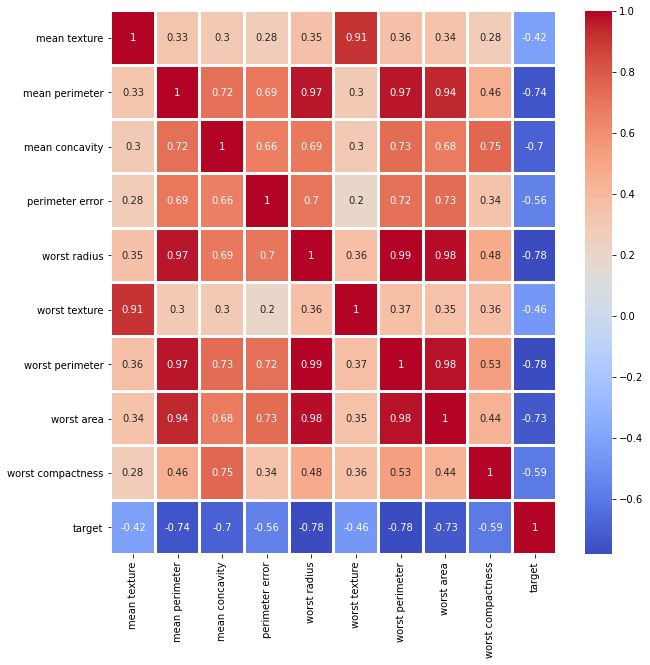

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(cancer_df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [0]:
X = cancer_df.drop(['target'], axis = 1)
X.head(6)

,mean texture,mean perimeter,mean concavity,perimeter error,worst radius,worst texture,worst perimeter,worst area,worst compactness
0,10.38,122.80,0.3001,8.589,25.38,17.33,184.60,2019.0,0.6656
1,17.77,132.90,0.0869,3.398,24.99,23.41,158.80,1956.0,0.1866
2,21.25,130.00,0.1974,4.585,23.57,25.53,152.50,1709.0,0.4245
3,20.38,77.58,0.2414,3.445,14.91,26.50,98.87,567.7,0.8663
4,14.34,135.10,0.1980,5.438,22.54,16.67,152.20,1575.0,0.2050
5,15.70,82.57,0.1578,2.217,15.47,23.75,103.40,741.6,0.5249


In [0]:
y = cancer_df['target']
y.head(6)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: target, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [0]:
from sklearn.svm import SVC                                         #Implementing SVC() classifier without normalization
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.9473684210526315

In [0]:
svc_classifier2 = SVC()                                             #Implementing SVC() classifier with normalization
svc_classifier2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.9736842105263158

In [0]:
# Logistic Regression without normalization
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9473684210526315

In [0]:
# Logistic Regression with normalization
lr_classifier2 = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_lr_sc)

0.42105263157894735

In [0]:
# K – Nearest Neighbor Classifier without normalization
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.9298245614035088

In [0]:
# KNN with normalization
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_knn_sc)

0.5789473684210527

In [0]:
# Naive Bayes Classifier without normalization
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_nb)

0.956140350877193

In [0]:
# With normalization
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_nb_sc)

0.956140350877193

In [0]:
# Decision Tree Classifier without normalization
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.956140350877193

In [0]:
# Decision Tree Classifier with normalization
dt_classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.5789473684210527

In [0]:
# Random Forest Classifier without normalization
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9649122807017544

In [0]:
# Random Forest Classifier with normalization
rf_classifier2 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_rf_sc)

0.5789473684210527

In [0]:
print(classification_report(y_test, y_pred_svc_sc))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



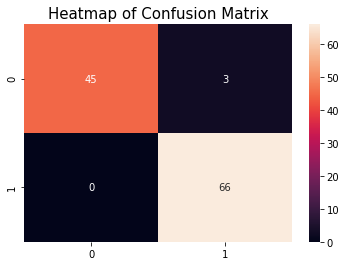

In [0]:
cm = confusion_matrix(y_test, y_pred_svc_sc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()